In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Solve data loading issue!
Sui_DF = pd.read_csv('Mental Health_Suicide Rate_Age Standard.csv')
GDP_DF = pd.read_csv('GDP_Test.csv')
GDP_DF.head()

,official_name_en,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940420,25324.720360,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,373.361116,445.893298,553.300289,603.537023,669.009051,638.612543,629.345250,569.577923,561.778746,585.850064
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.579014,3347.844900,3531.416878,4299.008136,4539.467689,4804.633826,4707.578098,3683.552607,3308.772828,4170.312280
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3952.830781,4131.872341,4537.862492
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659090,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840


In [4]:
# Suicide rate data
BothSex = Sui_DF.drop_duplicates(subset = ['official_name_en'], keep = 'first') # remove male & female data
BothSex = BothSex.drop(BothSex.index[0]) # remove first row
#df = df.assign(mean=df.mean(axis=1))
BothSex = BothSex.assign(MeanSuicideRate=BothSex.mean(axis=1)) # Add one more column about the average of 2000-2015 at the 
BothSex = BothSex[['official_name_en','MeanSuicideRate']] # Make data frame organized
BothSex = BothSex.sort_values(by='MeanSuicideRate', ascending=False) 
BothSex[:10] # Show top 10 data

# Select GDP data from 2000 to 2015
GDP_DF = GDP_DF[['official_name_en', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008','2009', '2010', '2012','2013', '2014', '2015']]
GDP_DF.head()

GDP_M = GDP_DF.assign(Mean_GDP=GDP_DF.mean(axis=1))
GDP_M = GDP_M[['official_name_en', 'Mean_GDP']]
GDP_M[:5]

,official_name_en,Mean_GDP
0,Aruba,23165.187985
1,Afghanistan,392.494083
2,Angola,2565.434853
3,Albania,3156.804663
4,Andorra,37467.056020


In [5]:
# Data merge
Merge2 = pd.merge(BothSex, GDP_M, on='official_name_en') 
Merge2 = Merge2.dropna()
Merge2[:5]

,official_name_en,MeanSuicideRate,Mean_GDP
0,Lithuania,33.650,10149.450128
1,Sri Lanka,33.125,2034.751252
2,Mongolia,31.600,2024.737647
3,Kazakhstan,30.650,6633.285424
4,Suriname,28.725,5702.977180


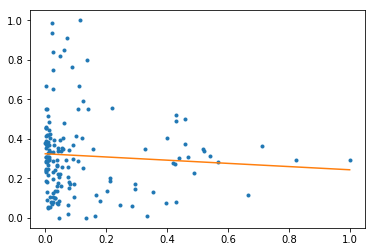

-0.07140521565734724

In [7]:
# Data normalize & Correlation study

Y = Merge2[['Mean_GDP']]
Z = Merge2[['MeanSuicideRate']]
# Normalization
Y_Norm=(Y-Y.min())/(Y.max()-Y.min())
Z_Norm=(Z-Z.min())/(Z.max()-Z.min())
T=Y_Norm.reset_index()
S=Z_Norm.reset_index()
M = pd.merge(T, S)

# Fitting (ref: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html)
p1 = np.polyfit(Y_Norm['Mean_GDP'], Z_Norm['MeanSuicideRate'], 1)
p1
p = np.poly1d(p1) # Get the function of fitting line; Later we can extract y value based on p(x)
xp = np.linspace(0, 1, 100)
_ = plt.plot(Y_Norm, Z_Norm, '.', xp, p(xp), '-')

# Show the scatter plot and the finning line
plt.show()
# Correlation coefficient 
M['Mean_GDP'].corr(M['MeanSuicideRate'])